In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("height-weight.csv")

In [4]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [5]:
df.tail()

,Weight,Height
18,76,150
19,87,167
20,45,129
21,56,140
22,72,160


In [6]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


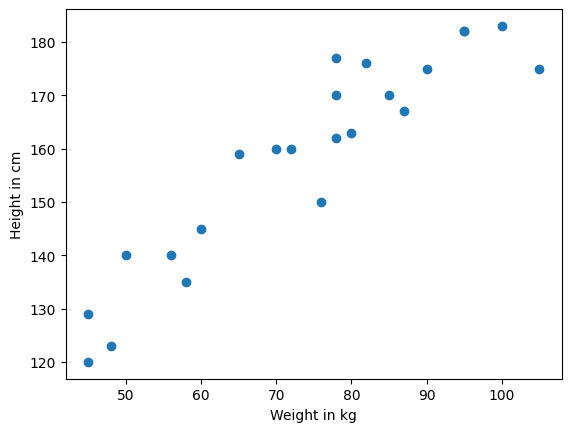

In [10]:
# Scatter plot
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight in kg")
plt.ylabel("Height in cm")
plt.show()

In [11]:
#  Correlation
df.corr() #perarsion correlation

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


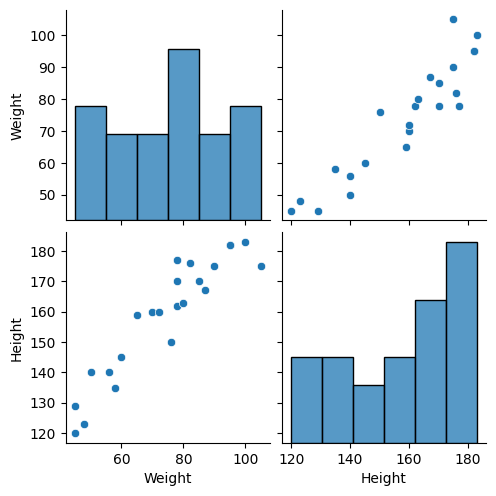

In [22]:
#  Seaborn for visulization
import seaborn as sns
sns.pairplot(df)
plt.show()


In [36]:
#  INdependent and dependent features
X = df[['Weight']] ## independent features should be data frame or 2 dimensional array
y = df['Height']  ## this should be in series form or in 1D array

In [35]:
X_series = df['Weight']
np.array(X_series).shape

(23,)

In [37]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [53]:
### Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state = 42)

In [54]:
X_train.shape

(17, 1)

In [55]:
#  Standardization
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [57]:
X_test = scaler.transform(X_test)

In [58]:
X_test

array([[ 0.33497168],
       [ 0.33497168],
       [-1.6641678 ],
       [ 1.36483141],
       [-0.45256812],
       [ 1.97063125]])

In [60]:
#  Apply Simple Linear Regression
from sklearn.linear_model import LinearRegression

In [64]:
regression = LinearRegression(n_jobs = -1)

In [65]:
regression.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,-1
,positive,False


In [67]:
print("Coefficient or slope: " , regression.coef_)
print("Intercept: " , regression.intercept_)

Coefficient or slope:  [17.2982057]
Intercept:  156.47058823529412


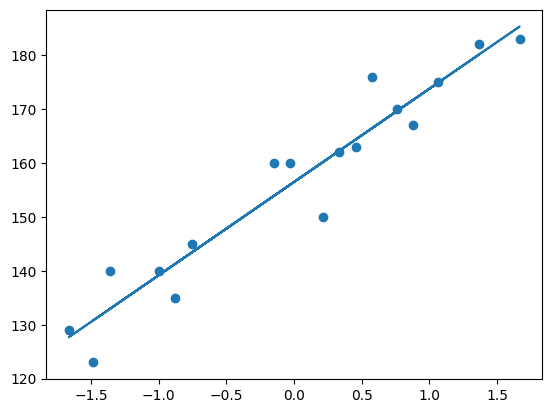

In [72]:
# plot Training data best fit line
plt.scatter(X_train,y_train)
plt.plot(X_train,regression.predict(X_train))
plt.show()

In [74]:
# Prediction for test data
y_pred = regression.predict(X_test)
y_pred

array([162.26499721, 162.26499721, 127.68347133, 180.07972266,
       148.64197186, 190.55897293])

In [76]:
#  Performance Metrices
from sklearn.metrics import  mean_absolute_error, mean_squared_error

In [79]:
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

114.84069295228699
9.665125886795005
10.716374991212605


In [80]:
from sklearn.metrics import r2_score

In [82]:
score = r2_score(y_test,y_pred)
print(score)

0.7360826717981276


In [85]:
# display adjusted R-squared
1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.6701033397476595

In [88]:
#  OLS Linear Regression
import statsmodels.api as sm

In [89]:
model = sm.OLS(y_train,X_train).fit()

In [91]:
prediction = model.predict(X_test)
prediction

array([  5.79440897,   5.79440897, -28.78711691,  23.60913442,
        -7.82861638,  34.08838469])

In [92]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.050
Method:                 Least Squares   F-statistic:                             0.1953
Date:                Thu, 18 Dec 2025   Prob (F-statistic):                       0.664
Time:                        15:38:31   Log-Likelihood:                         -110.03
No. Observations:                  17   AIC:                                      222.1
Df Residuals:                      16   BIC:                                      222.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [95]:
#  Prediction for new data

regression.predict(scaler.transform([[72]]))

C:\Users\hp\anaconda3\envs\booksenv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([155.97744705])